# First steps
* Different options to drop
* Fill nan
* Imputer

In [100]:
import pyspark

In [101]:
# Import PySpark and create a SparkSession
from pyspark.sql import SparkSession
# https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameReader.html#pyspark.sql.DataFrameReader
spark = SparkSession.builder.appName("ImportData").getOrCreate()

In [102]:
spark

# Ler o ficheiro

In [104]:
# Read a CSV file and create a DataFrame
# https://spark.apache.org/docs/latest/sql-data-sources-csv.html
df_customers=spark.read.option("header","true").csv('./data/customers_data.csv',inferSchema=True)

In [111]:
df_customers.show(10,truncate=30)

+------------------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+-----------------------+------+-------+
|                            Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|              startDate|months|dropout|
+------------------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+-----------------------+------+-------+
|00130FE8-5D34-4C66-9819-1EB...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0| 2017-05-02 09:43:11.32|     1|      1|
|0016D0DD-E713-4EDC-BAA3-386...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0| 2016-04-20 18:33:21.17|    19|      0|
|001A70CA-0985-42D1-A0C0-6D7...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|2015-12-01 19:47:59.513|     8|      1|
|001B9AC2-7711-4384-BF9D-C52...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|2015-10-06 16:33:47.983|     3| 

In [112]:
type(df_customers)

pyspark.sql.dataframe.DataFrame

In [114]:
df_customers.describe().show(truncate=10)

+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|summary|        Id|       age|       sex| dayswfreq|   tbilled|   maccess|   freeuse|  nentries|     cfreq| nrenewals|      cref|    months|   dropout|
+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|  count|      5216|      5216|      5216|      5216|      5216|      5216|      5211|      5216|      5210|      5216|      5216|      5216|      5216|
|   mean|      NULL|27.8748...|0.35161...|76.3274...|155.225...|0.89195...|0.04874...|29.0404...|6.86180...|0.77684...|0.00555...|9.34547...|0.87538...|
| stddev|      NULL|11.8000...|0.47751...|101.761...|162.365...|0.76325...|0.21535...|41.1311...|0.72135...|0.90022...|0.07689...|8.21717...|0.33031...|
|    min|00130FE...|         0|         0|         0|       3.6|      0.01|       

In [118]:
df_customers.columns

['Id',
 'age',
 'sex',
 'dayswfreq',
 'tbilled',
 'maccess',
 'freeuse',
 'nentries',
 'cfreq',
 'nrenewals',
 'cref',
 'startDate',
 'months',
 'dropout']

In [116]:
len(df_customers.columns)

14

In [124]:
features = ['age', 'sex', 'dayswfreq', 'tbilled', 'maccess', 'freeuse', 'nentries', 'cfreq', 'nrenewals', 'cref', 'months', 'dropout']

In [125]:
df_customers[features].show()

+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|months|dropout|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|     1|      1|
| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    19|      0|
| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|     8|      1|
| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|     3|      1|
| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    24|      1|
| 20|  0|       38|  118.6|   0.33|      0|      11|    7|        2|   0|    10|      1|
| 26|  1|      279|   53.2|   0.16|      0|       6|    7|        1|   0|     9|      1|
| 44|  0|       45|  314.7|   0.93|   NULL|      52|    7|        2|   0|    15|      1|
| 20|  0|       56|  

In [119]:
df_customers.select(features).show(10,truncate=30)

+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|months|dropout|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|     1|      1|
| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    19|      0|
| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|     8|      1|
| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|     3|      1|
| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    24|      1|
| 20|  0|       38|  118.6|   0.33|      0|      11|    7|        2|   0|    10|      1|
| 26|  1|      279|   53.2|   0.16|      0|       6|    7|        1|   0|     9|      1|
| 44|  0|       45|  314.7|   0.93|   NULL|      52|    7|        2|   0|    15|      1|
| 20|  0|       56|  

# Drop

* Vamos utilizar isnull

In [126]:
from pyspark.sql.functions import col,isnan,isnull,when

df_customers.select("Id","age","freeuse").where(isnull("freeuse")).show()

+--------------------+---+-------+
|                  Id|age|freeuse|
+--------------------+---+-------+
|0069B925-0586-4E7...| 44|   NULL|
|0083CE4F-47A8-45B...| 20|   NULL|
|0088A9D2-5494-485...| 21|   NULL|
|009BD52A-653D-4FE...| 21|   NULL|
|00C476BE-79D1-45F...| 26|   NULL|
+--------------------+---+-------+



In [128]:
df_customers.na.fill(99999).show(truncate=20)

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|00130FE8-5D34-4C6...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|2017-05-02 09:43:...|     1|      1|
|0016D0DD-E713-4ED...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|2016-04-20 18:33:...|    19|      0|
|001A70CA-0985-42D...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|2015-12-01 19:47:...|     8|      1|
|001B9AC2-7711-438...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|2015-10-06 16:33:...|     3|      1|
|001D927E-ACD2-4B3...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|    

In [129]:
df_customers.na.drop().show(truncate=20)

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|00130FE8-5D34-4C6...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|2017-05-02 09:43:...|     1|      1|
|0016D0DD-E713-4ED...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|2016-04-20 18:33:...|    19|      0|
|001A70CA-0985-42D...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|2015-12-01 19:47:...|     8|      1|
|001B9AC2-7711-438...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|2015-10-06 16:33:...|     3|      1|
|001D927E-ACD2-4B3...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|    

In [64]:
# drop any column freeuse na
df_customers.na.drop(how="any",subset=['freeuse']).show(truncate=5)

+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|   Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|startDate|months|dropout|
+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|00...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|    20...|     1|      1|
|00...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    20...|    19|      0|
|00...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|    20...|     8|      1|
|00...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|    20...|     3|      1|
|00...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    20...|    24|      1|
|00...| 20|  0|       38|  118.6|   0.33|      0|      11|    7|        2|   0|    20...|    10|      1|
|00...| 26|  1|      279|   53.2|   0.16|      0|      

In [28]:
# fill freeuse with 9999
df_customers.na.fill(9999,["freeuse"]).show(truncate=5)

+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|   Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|startDate|months|dropout|
+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+
|00...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|    20...|     1|      1|
|00...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    20...|    19|      0|
|00...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|    20...|     8|      1|
|00...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|    20...|     3|      1|
|00...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    20...|    24|      1|
|00...| 20|  0|       38|  118.6|   0.33|      0|      11|    7|        2|   0|    20...|    10|      1|
|00...| 26|  1|      279|   53.2|   0.16|      0|      

# Imputer

In [130]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['freeuse'], 
    outputCols=["{}_imputed".format(c) for c in ['freeuse']]
    ).setStrategy("median")

In [131]:
imputer.fit(df_customers).transform(df_customers).show(truncate=5)

+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+---------------+
|   Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|startDate|months|dropout|freeuse_imputed|
+-----+---+---+---------+-------+-------+-------+--------+-----+---------+----+---------+------+-------+---------------+
|00...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|    20...|     1|      1|              0|
|00...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    20...|    19|      0|              0|
|00...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|    20...|     8|      1|              0|
|00...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|    20...|     3|      1|              0|
|00...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    20...|    24|      1|              0|
|00...| 20|  0|       38|  118.6

# Matrix de correlação

* temos que converter para um vector com 1 dimensão
* temos um dataframe dados heterogeneous e queremos converter para um array homogeneo
* Most machine learning algorithms are designed to work with numerical vectors
 

In [132]:
# Read a CSV file and create a DataFrame
df_customers=spark.read.option("header","true").csv('./data/customers_data.csv',inferSchema=True)

In [133]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F

In [134]:
df_customers[features].show(5)

+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|months|dropout|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|     1|      1|
| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|    19|      0|
| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|     8|      1|
| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|     3|      1|
| 21|  1|       18|  113.2|   0.08|      0|       7|    7|        3|   0|    24|      1|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
only showing top 5 rows



## Select null values
```python
df_customers.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in features]).show()
```
* [ ... ]: This is a list comprehension that creates a list of column expressions.
* F.count(...): This part uses the count function from pyspark.sql.functions (imported as F) to count the number of occurrences within each expression.
* F.when(..., ...): This is a conditional expression. It checks two conditions:
* F.isnan(c): This checks if the value in column c is NaN (Not a Number).
* F.col(c).isNull(): This checks if the value in column c is null.
* |: This is the pipe (OR) operator. The count will increment if either condition is true (NaN or null value).
* .alias(c): This part assigns an alias (c) to the resulting count for each column. This makes the column names in the output DataFrame more readable.

In [135]:
# check null values
df_customers.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in features]).show()

+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|months|dropout|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|  0|  0|        0|      0|      0|      5|       0|    6|        0|   0|     0|      0|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+



In [86]:
df_customers.filter(df_customers['freeuse'].isNull()).show(5)

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|0069B925-0586-4E7...| 44|  0|       45|  314.7|   0.93|   NULL|      52|    7|        2|   0|2015-04-17 08:06:...|    15|      1|
|0083CE4F-47A8-45B...| 20|  0|       56|  201.7|   0.31|   NULL|      27|    7|        3|   0|2015-10-02 12:06:...|    22|      1|
|0088A9D2-5494-485...| 21|  0|        4|   73.6|   2.26|   NULL|      21|    7|        0|   0|2017-02-28 12:44:...|     3|      1|
|009BD52A-653D-4FE...| 21|  1|       92|   37.6|   0.11|   NULL|       1|    7|        1|   0|2015-06-15 10:07:...|     3|      1|
|00C476BE-79D1-45F...| 26|  0|       39|  188.6|   1.06|   NULL|      28|    7|    

In [87]:
df_customers.filter(df_customers['cfreq'].isNull()).show(10)

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|4CA4608D-9366-46C...| 26|  0|       22|   58.6|    0.7|      0|       3| NULL|        0|   0|2017-10-02 12:56:...|     1|      0|
|649D78E8-4C98-439...| 26|  0|        6|  126.1|   0.03|      0|       3| NULL|        2|   0|2015-10-09 09:52:...|    25|      0|
|6ABEE4C8-951A-4FE...| 21|  0|        8|   58.6|   1.63|      0|       7| NULL|        0|   0|2017-10-02 15:05:...|     1|      0|
|A7438DA1-1801-4E7...| 18|  0|        5|   58.6|   3.25|      0|      13| NULL|        0|   0|2017-10-04 18:55:...|     1|      0|
|AEEDCE35-83DC-4CC...| 20|  0|        4|   58.6|   3.03|      0|      13| NULL|    

In [140]:
# drop nulls values
df_customers = df_customers.dropna(subset=['freeuse', 'cfreq'])

In [141]:
# check null values
df_customers.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in features]).show()

+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|months|dropout|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+
|  0|  0|        0|      0|      0|      0|       0|    0|        0|   0|     0|      0|
+---+---+---------+-------+-------+-------+--------+-----+---------+----+------+-------+



In [90]:
df_customers.show(5)

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+
|00130FE8-5D34-4C6...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|2017-05-02 09:43:...|     1|      1|
|0016D0DD-E713-4ED...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|2016-04-20 18:33:...|    19|      0|
|001A70CA-0985-42D...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|2015-12-01 19:47:...|     8|      1|
|001B9AC2-7711-438...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0|   0|2015-10-06 16:33:...|     3|      1|
|001D927E-ACD2-4B3...| 21|  1|       18|  113.2|   0.08|      0|       7|    7|    

In [142]:
features

['age',
 'sex',
 'dayswfreq',
 'tbilled',
 'maccess',
 'freeuse',
 'nentries',
 'cfreq',
 'nrenewals',
 'cref',
 'months',
 'dropout']

In [143]:
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_assembled = assembler.transform(df_customers)
df_assembled.show()

+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+--------------------+
|                  Id|age|sex|dayswfreq|tbilled|maccess|freeuse|nentries|cfreq|nrenewals|cref|           startDate|months|dropout|            features|
+--------------------+---+---+---------+-------+-------+-------+--------+-----+---------+----+--------------------+------+-------+--------------------+
|00130FE8-5D34-4C6...| 23|  1|        7|   37.6|   1.35|      0|       6|    7|        0|   0|2017-05-02 09:43:...|     1|      1|[23.0,1.0,7.0,37....|
|0016D0DD-E713-4ED...| 34|  1|      328|  205.6|   0.54|      0|      39|    7|        2|   0|2016-04-20 18:33:...|    19|      0|[34.0,1.0,328.0,2...|
|001A70CA-0985-42D...| 24|  0|        3|  140.0|    0.8|      0|      28|    7|        0|   0|2015-12-01 19:47:...|     8|      1|[24.0,0.0,3.0,140...|
|001B9AC2-7711-438...| 20|  1|       41|   71.6|    1.0|      0|      13|    7|        0

In [154]:
matrix = Correlation.corr(df_assembled, "features")
result = matrix.collect()[0]["pearson(features)"].values

result

array([ 1.        , -0.05261184, -0.06114127,  0.26556974,  0.07153221,
        0.02573219,  0.09373279, -0.25086728,  0.09222838,  0.0539945 ,
        0.08846267, -0.23279579, -0.05261184,  1.        , -0.04695518,
        0.03849536,  0.10444157,  0.07207284,  0.09380605,  0.10280766,
        0.01727373, -0.0063087 ,  0.04409213, -0.00895751, -0.06114127,
       -0.04695518,  1.        , -0.13416639, -0.41439499,  0.0100679 ,
       -0.18758926, -0.01153372,  0.23681088, -0.01244277,  0.17923565,
        0.18040598,  0.26556974,  0.03849536, -0.13416639,  1.        ,
        0.1792693 ,  0.12820067,  0.73227319, -0.13314389,  0.54869229,
        0.11083614,  0.68522171, -0.35504036,  0.07153221,  0.10444157,
       -0.41439499,  0.1792693 ,  1.        , -0.01988687,  0.46971485,
        0.07759188, -0.15047663, -0.01284269, -0.11103708, -0.25033027,
        0.02573219,  0.07207284,  0.0100679 ,  0.12820067, -0.01988687,
        1.        ,  0.11909698,  0.03229684,  0.15129051,  0.04

In [93]:
matrix.collect()[0]["pearson({})".format("features")].values

array([ 1.        , -0.05261184, -0.06114127,  0.26556974,  0.07153221,
        0.02573219,  0.09373279, -0.25086728,  0.09222838,  0.0539945 ,
        0.08846267, -0.23279579, -0.05261184,  1.        , -0.04695518,
        0.03849536,  0.10444157,  0.07207284,  0.09380605,  0.10280766,
        0.01727373, -0.0063087 ,  0.04409213, -0.00895751, -0.06114127,
       -0.04695518,  1.        , -0.13416639, -0.41439499,  0.0100679 ,
       -0.18758926, -0.01153372,  0.23681088, -0.01244277,  0.17923565,
        0.18040598,  0.26556974,  0.03849536, -0.13416639,  1.        ,
        0.1792693 ,  0.12820067,  0.73227319, -0.13314389,  0.54869229,
        0.11083614,  0.68522171, -0.35504036,  0.07153221,  0.10444157,
       -0.41439499,  0.1792693 ,  1.        , -0.01988687,  0.46971485,
        0.07759188, -0.15047663, -0.01284269, -0.11103708, -0.25033027,
        0.02573219,  0.07207284,  0.0100679 ,  0.12820067, -0.01988687,
        1.        ,  0.11909698,  0.03229684,  0.15129051,  0.04

In [155]:
len(features)

12

In [94]:
import numpy as np 

correlation_values = matrix.collect()[0]["pearson({})".format("features")].values

num_features = len(features)  # Replace with the number of features
correlation_matrix = np.array(correlation_values).reshape(num_features, num_features)


In [157]:
correlation_matrix

array([[ 1.        , -0.05261184, -0.06114127,  0.26556974,  0.07153221,
         0.02573219,  0.09373279, -0.25086728,  0.09222838,  0.0539945 ,
         0.08846267, -0.23279579],
       [-0.05261184,  1.        , -0.04695518,  0.03849536,  0.10444157,
         0.07207284,  0.09380605,  0.10280766,  0.01727373, -0.0063087 ,
         0.04409213, -0.00895751],
       [-0.06114127, -0.04695518,  1.        , -0.13416639, -0.41439499,
         0.0100679 , -0.18758926, -0.01153372,  0.23681088, -0.01244277,
         0.17923565,  0.18040598],
       [ 0.26556974,  0.03849536, -0.13416639,  1.        ,  0.1792693 ,
         0.12820067,  0.73227319, -0.13314389,  0.54869229,  0.11083614,
         0.68522171, -0.35504036],
       [ 0.07153221,  0.10444157, -0.41439499,  0.1792693 ,  1.        ,
        -0.01988687,  0.46971485,  0.07759188, -0.15047663, -0.01284269,
        -0.11103708, -0.25033027],
       [ 0.02573219,  0.07207284,  0.0100679 ,  0.12820067, -0.01988687,
         1.        ,  

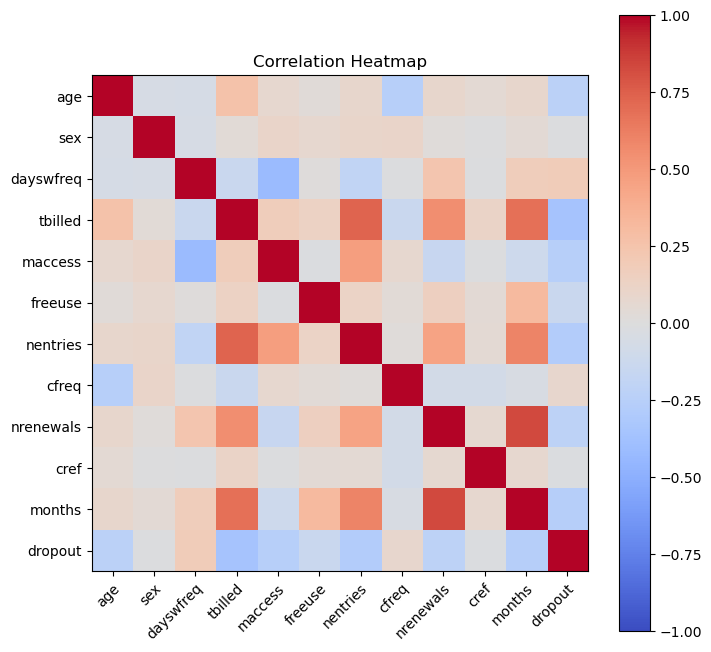

In [156]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)  # Set desired size in inches

heatmap = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)  

# Add labels (replace with your feature names)
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)

# Rotate x-axis labels for readability 
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a colorbar
plt.colorbar(heatmap)

plt.title("Correlation Heatmap")
plt.show()


In [159]:
#df_customers.corr(col1=features, col2=features)
df_customers.corr('months', 'nrenewals')

0.8323731760207659

In [160]:
# Stop the SparkSession
spark.stop()